In [ ]:

!pip install rasterio


import numpy as np
import rasterio
from rasterio.transform import from_origin
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from google.colab import files


time_steps = 10
height = 20
width = 20
ndvi_stack = np.stack([
    np.clip(np.random.normal(loc=0.2 + i*0.05, scale=0.1, size=(height, width)), -1, 1)
    for i in range(time_steps)
], axis=0)


ndvi_reshaped = ndvi_stack.reshape(time_steps, height * width)


def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 3
X, y = create_sequences(ndvi_reshaped, seq_length)

# LSTM Model
model = Sequential([
    LSTM(64, activation='relu', input_shape=(seq_length, height * width)),
    Dense(height * width)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=50, batch_size=1, verbose=0)


last_seq = ndvi_reshaped[-seq_length:]
forecast = model.predict(last_seq.reshape(1, seq_length, height * width))
forecast_image = forecast.reshape(height, width)

# SaveGeoTIFF
transform = from_origin(0, 0, 1, 1)
with rasterio.open(
    'forecasted_ndvi.tif',
    'w',
    driver='GTiff',
    height=forecast_image.shape[0],
    width=forecast_image.shape[1],
    count=1,
    dtype=forecast_image.dtype,
    crs='+proj=latlong',
    transform=transform
) as dst:
    dst.write(forecast_image, 1)

# Download the file
files.download('forecasted_ndvi.tif')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 28.3 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


/usr/local/lib/python3.11/dist-packages/rasterio/__init__.py:366: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

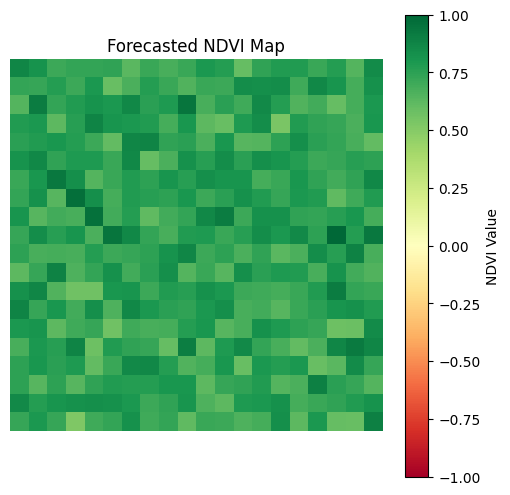

In [ ]:
import matplotlib.pyplot as plt
import rasterio

# Loadimg
with rasterio.open('forecasted_ndvi.tif') as src:
    ndvi_forecast = src.read(1)

# Display it using a green-red colormap (NDVI standard)
plt.figure(figsize=(6, 6))
plt.imshow(ndvi_forecast, cmap='RdYlGn', vmin=-1, vmax=1)
plt.colorbar(label='NDVI Value')
plt.title('Forecasted NDVI Map')
plt.axis('off')
plt.show()


NDVI Statistics
----------------
Mean NDVI: 0.7481
Max NDVI: 1.0321
Min NDVI: 0.5200
Standard Deviation: 0.0818


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


/usr/local/lib/python3.11/dist-packages/rasterio/__init__.py:366: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

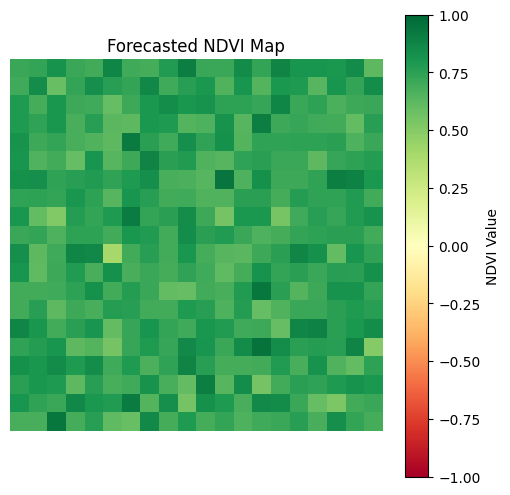

NDVI Statistics
----------------
Mean NDVI: 0.7380
Max NDVI: 0.9499
Min NDVI: 0.3984
Standard Deviation: 0.0807
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

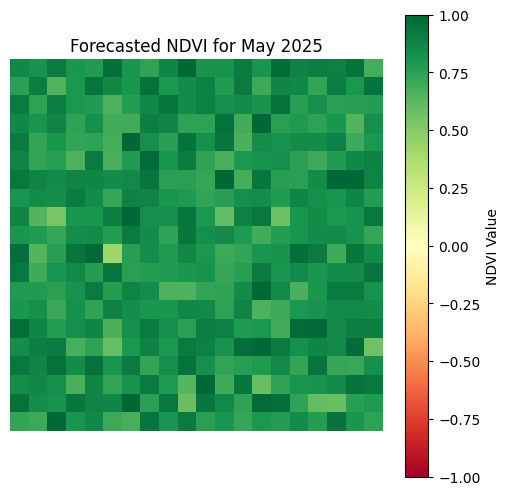

May 2025 NDVI Statistics
------------------------
Mean NDVI: 0.8224
Max NDVI: 1.0700
Min NDVI: 0.4209
Standard Deviation: 0.0954


In [ ]:

!pip install rasterio


import numpy as np
import rasterio
from rasterio.transform import from_origin
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from google.colab import files
import matplotlib.pyplot as plt


time_steps = 10
height = 20
width = 20
ndvi_stack = np.stack([
    np.clip(np.random.normal(loc=0.2 + i*0.05, scale=0.1, size=(height, width)), -1, 1)
    for i in range(time_steps)
], axis=0)

# Reshape for LSTM
ndvi_reshaped = ndvi_stack.reshape(time_steps, height * width)


def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 3
X, y = create_sequences(ndvi_reshaped, seq_length)


model = Sequential([
    LSTM(64, activation='relu', input_shape=(seq_length, height * width)),
    Dense(height * width)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=50, batch_size=1, verbose=0)


last_seq = ndvi_reshaped[-seq_length:]
forecast = model.predict(last_seq.reshape(1, seq_length, height * width))
forecast_image = forecast.reshape(height, width)

# Save GeoTIFF
transform = from_origin(0, 0, 1, 1)
with rasterio.open(
    'forecasted_ndvi.tif',
    'w',
    driver='GTiff',
    height=forecast_image.shape[0],
    width=forecast_image.shape[1],
    count=1,
    dtype=forecast_image.dtype,
    crs='+proj=latlong',
    transform=transform
) as dst:
    dst.write(forecast_image, 1)

files.download('forecasted_ndvi.tif')


with rasterio.open('forecasted_ndvi.tif') as src:
    ndvi_forecast = src.read(1)

plt.figure(figsize=(6, 6))
plt.imshow(ndvi_forecast, cmap='RdYlGn', vmin=-1, vmax=1)
plt.colorbar(label='NDVI Value')
plt.title('Forecasted NDVI Map')
plt.axis('off')
plt.show()


print("NDVI Statistics")
print("----------------")
print(f"Mean NDVI: {np.mean(ndvi_forecast):.4f}")
print(f"Max NDVI: {np.max(ndvi_forecast):.4f}")
print(f"Min NDVI: {np.min(ndvi_forecast):.4f}")
print(f"Standard Deviation: {np.std(ndvi_forecast):.4f}")

# --- Predicting for May 2025 ---


last_seq_extended = np.concatenate((last_seq[1:], forecast.reshape(1, height * width)), axis=0)
forecast_may_2025 = model.predict(last_seq_extended.reshape(1, seq_length, height * width))
forecast_may_2025_image = forecast_may_2025.reshape(height, width)


with rasterio.open(
    'forecasted_ndvi_may_2025.tif',
    'w',
    driver='GTiff',
    height=forecast_may_2025_image.shape[0],
    width=forecast_may_2025_image.shape[1],
    count=1,
    dtype=forecast_may_2025_image.dtype,
    crs='+proj=latlong',
    transform=transform
) as dst:
    dst.write(forecast_may_2025_image, 1)

files.download('forecasted_ndvi_may_2025.tif')


plt.figure(figsize=(6, 6))
plt.imshow(forecast_may_2025_image, cmap='RdYlGn', vmin=-1, vmax=1)
plt.colorbar(label='NDVI Value')
plt.title('Forecasted NDVI for May 2025')
plt.axis('off')
plt.show()


print("May 2025 NDVI Statistics")
print("------------------------")
print(f"Mean NDVI: {np.mean(forecast_may_2025_image):.4f}")
print(f"Max NDVI: {np.max(forecast_may_2025_image):.4f}")
print(f"Min NDVI: {np.min(forecast_may_2025_image):.4f}")
print(f"Standard Deviation: {np.std(forecast_may_2025_image):.4f}")
